<a href="https://colab.research.google.com/github/AngieCat26/MujeresDigitales/blob/main/Taller_semana_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción

**Contexto comercial.** Usted es un analista en una entidad bancaria, y se le proporciona un conjunto de datos de los clientes. Su jefe le pide que analice la información para determinar si existen similaridades entre grupos de clientes para lanzar una campaña de mercadeo.

**Problema comercial.** Su tarea es **crear un modelo de clusterización para determinar si existen grupos de clientes similares**.

**Contexto analítico.** Como científico de datos, se le pide realizar una clusterización de los clientes para identificar 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn # Paquete base de ML

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [5]:
url = 'https://raw.githubusercontent.com/AngieCat26/MujeresDigitales/main/Lending_club_cleaned_2.csv'
df = pd.read_csv(url)


,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B
...,...,...,...,...,...,...,...,...,...,...
38700,Fully Paid,110000.0,Not Verified,4 years,MORTGAGE,8.07%,2500,home_improvement,36 months,A
38701,Fully Paid,18000.0,Not Verified,3 years,RENT,10.28%,8500,credit_card,36 months,C
38702,Fully Paid,100000.0,Not Verified,< 1 year,MORTGAGE,8.07%,5000,debt_consolidation,36 months,A
38703,Fully Paid,200000.0,Not Verified,< 1 year,MORTGAGE,7.43%,5000,other,36 months,A


In [6]:
df.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


## Ejercicio 1:

Realice una normalización de los datos numéricos es decir que los valores oscilen entre 0 y 1 en las columnas  annual_inc y loan_amnt.
Consejo: antes de realizar la normalización asegúrese de que el tipo de dichas columnas si sea numérico.

In [17]:
# Escriba aquí su codigo
def normalize(df):
  resultado = df.copy()
  for normalizado in df.columns:
    max = df[normalizado].max()
    min = df[normalizado].min()
    resultado[normalizado] = (df[normalizado] - min) / (max - min)
  return resultado



In [23]:
df_normalizado = normalize(df[['annual_inc', 'loan_amnt']])
# plt.figure(figsize=(6, 6))
# plt.scatter(df_normalizado['annual_inc'], df_normalizado['loan_amnt'], edgecolor='k')
# plt.xlabel('annual_inc', fontsize=12)
# plt.xticks(fontsize=12)
# plt.ylabel('loan_amnt', fontsize=12)
# plt.yticks(fontsize=12)
# plt.title('annual_inc vs loan_amnt', fontsize=16)
# plt.show
df_normalizado


,annual_inc,loan_amnt
0,0.003336,0.130435
1,0.004336,0.057971
2,0.001376,0.055072
3,0.007538,0.275362
4,0.012675,0.072464
...,...,...
38700,0.017678,0.057971
38701,0.002335,0.231884
38702,0.016011,0.130435
38703,0.032688,0.130435


## Ejercicio 2:

Emplee el algoritmo de k-means para agrupar a los clientes usando un número de clusters de 4.

In [25]:
# Escriba aquí su codigo
k = 4
kmeans = KMeans(n_clusters = k, init='k-means++')
kmeans.fit(df_normalizado)

labels = kmeans.predict(df_normalizado)
centroids = kmeans.cluster_centers_
centroids

array([[0.01265608, 0.48122444],
       [0.00849035, 0.11657391],
       [0.01788992, 0.78197901],
       [0.0104421 , 0.27980335]])

## Ejercicio 3 (Opcional):

Realice un gráfico de dispersión (scatter) para vizualizar los cluster que descubrió en el punto anterior (ejercicio 2). Usando colores diferentes para identificar los 4 cluster.

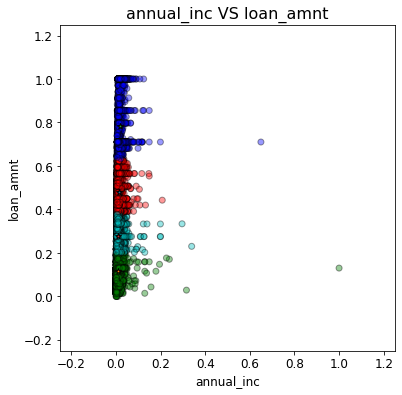

In [28]:
# Escriba aquí su codigo
plt.figure(figsize=(6, 6))
color_map = {1:'r', 2:'g', 3:'b' , 4:'c', 5:'y', 6:'w'}
colors = [color_map[x+1] for x in labels]

plt.scatter(df_normalizado['annual_inc'], df_normalizado['loan_amnt'], color=colors, alpha=0.4, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, marker='*', edgecolor='k')
plt.xlim(-0.25, 1.25)
plt.xlabel('annual_inc', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-0.25, 1.25)
plt.ylabel('loan_amnt', fontsize=12)
plt.yticks(fontsize=12)
plt.title('annual_inc VS loan_amnt', fontsize=16)
plt.show()

## Ejercicio 4 (Opcional):

Use el método del codo para verificar cual es el número de clusters óptimo. Revise desde 1 clúster hasta 11 para realizar esta validación.

In [ ]:
# Escriba aquí su codigo
